# Proposal: Predicting Success based on Facebook Post Types

By: Sara Jafroudi, Enoch Cheung, Jason Ngo, Bruno Gagnon
---------------------------------------------------------------------------------------------------------


### Table of Contents:
1. Sypnosis
    - Research Question
    - Summary
<p></p>
2. Our Data Set 
    - Packages Used
    - Loading and Cleansing
    
---------------------------------------------------------------------------------------------------------

### 1.) Sypnosis: 

##### Research Question:
How can an author increase engagement from users on Facebook and can we predict the success of a post using insights from an author's page?


##### Overview:


<p></p>
The market utility of social media platforms such as Facebook, which are able to generate mass revenues for cosmetic brands, has been an established and exploited advertising strategy in the digital age (Moro et. al, 2016). The goal of this project is to take a predictive analytical approach to determine which type of Facebook post (i.e., photo, video, status, or link) will engage the most internet-user engagement, determined through variables such as likes, post consumptions, and post total reach. The dataset which will be used for this analysis was acquired through an experimental data mining technique which included scraping data from the Facebook page of an internationally renowned cosmetics company on posts made between January 1st and December 31st (Moro et. al., 2016).

##### Consideration of Data:
<p></p>
Our data includes posts from both paid and non-paid marketing campaigns. Social media algorithms that adjust prioritizations between paid and non-paid posts can heavily factor into our metrics received and should be considered in this analysis. In order to explore the relationship between post type and our defined success metric, we can further isolate our data into paid and unpaid categories.

<p></p>
With our acquired data, we must first compartmentalize into training and testing sets before performing an exploratory data analysis on our dataset. We chose to approach our training data by creating a 80:20 ratio between testing and training data meaning 80% of our total data will be labeled as the “general training set” and the remainder as our “test set”. The general training set will be further partitioned into a “validation set” and “training set” in order to reduce bias within our model data and testing data. Now that we’ve labeled our training data, we can further explore the summary statistics within each set. 

##### Methodologies Used:
<p></p>
For the methodology, we will use the variables of the continuous numerical variables of total reaches (Lifetime_Post_Total_Reach) and of the number of total impressions (Lifetime_Post_Total_Impressions), and the categorical variable of Facebook post (Type). First, we will look at the relationship between these variables in a scatter plot graph that will help us to formulate our hypothesis. Then, as we are trying to predict the type of post that will be the most successful, we will use a K-nearest neighbour classification analysis. To do so, we must determine the K value using cross-validation of the training data. Then, we will need to test the accuracy of the classifier with the testing data.

##### Expected Outcomes and Significance:
<p></p>
We expect to find that posts which include media, such as photos and videos, are more likely to engage users than other posts, such as statuses and links. This is based on the assumption that the former types of posts might be more likely to be shared and thus will have more exposure.
It is beneficial for social media platforms to increase user engagement, as this is likely to increase revenue through advertising. Therefore, these findings may be used to choose what type of posts are prioritized to maximize user engagement.
<p></p>
These findings may lead to further exploration of how the contents of these posts impact user engagement. This may include the duration of a video, content of an image, length of a status, or details about the contents of a link. 

---------------------------------------------------------------------------------------------------------

### 2.) Dataset

##### Packages Used: (please run before moving forward)

In [2]:
install.packages("caTools")
library(caTools)

library(tidyverse)
library(repr)
library(tidymodels)
library(MASS)
options(repr.matrix.max.rows = 8)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔

In [5]:
facebook <- read_csv2("data/dataset_Facebook.csv")

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Page total likes` = col_double(),
  Type = col_character(),
  Category = col_double(),
  `Post Month` = col_double(),
  `Post Weekday` = col_double(),
  `Post Hour` = col_double(),
  Paid = col_double(),
  `Lifetime Post Total Reach` = col_double(),
  `Lifetime Post Total Impressions` = col_double(),
  `Lifetime Engaged Users` = col_double(),
  `Lifetime Post Consumers` = col_double(),
  `Lifetime Post Consumptions` = col_double(),
  `Lifetime Post Impressions by people who have liked your Page` = col_double(),
  `Lifetime Post reach by people who like your Page` = col_double(),
  `Lifetime People who have liked your Page and engaged with your post` = col_double(),
  comment = col_double(),
  like = col_double(),
  share = col_double(),
  `Total Interactions` = col_double()
)



Given that the original data set is formatted in characters and doubles, we must first set our categorial data to factors. We also see that the column headers have spaces present and may provide issues with calling variables in our workflow so we have replaced spaces with "_".

In [6]:
# Replacing specified columns to categorical factors
cols <- c("Type", "Category", "Post Month", "Paid", "Post Weekday", "Post Hour")
facebook[cols] <- lapply(facebook[cols], as.factor)

# Renaming column headers without spaces
facebook_colname_fix <- facebook

facebook_col_name_vec <- gsub(" ", "_", colnames(facebook))
colnames(facebook) <- facebook_col_name_vec

glimpse(facebook)

Rows: 500
Columns: 19
$ Page_total_likes                                                    <dbl> 1…
$ Type                                                                <fct> P…
$ Category                                                            <fct> 2…
$ Post_Month                                                          <fct> 1…
$ Post_Weekday                                                        <fct> 4…
$ Post_Hour                                                           <fct> 3…
$ Paid                                                                <fct> 0…
$ Lifetime_Post_Total_Reach                                           <dbl> 2…
$ Lifetime_Post_Total_Impressions                                     <dbl> 5…
$ Lifetime_Engaged_Users                                              <dbl> 1…
$ Lifetime_Post_Consumers                                             <dbl> 1…
$ Lifetime_Post_Consumptions                                          <dbl> 1…
$ Lifetime_Post_Impressions_by

We see that our data is not categorized in doubles and factor types which will be necessary to manipulate and create our model from.




### Let us select only the data values relevant to our case scenario

We want to explain the best type of post possible and thus we should first explore the relationship between the metrics produced by a post and the individual post type. We will measure the following key performance indicators for a post's success:
- comments
- likes
- shares
- total interactions (summation of the 3 observations above)
- total impressions

We will consider removing data points with missing values if minuscule. <br>
***For our initial proposal, we will only explore paid posts.***

In [7]:
facebook_clean <- dplyr::select(facebook, Type, comment,
                                like, share, Total_Interactions,
                                Paid, Lifetime_Post_Total_Impressions, Lifetime_Post_Total_Reach) %>% na.omit(df)

facebook_clean_unpaid <- facebook_clean %>% filter(Paid == 0)
facebook_clean_paid <- facebook_clean %>% filter(Paid == 1)

facebook_clean_unpaid

Type,comment,like,share,Total_Interactions,Paid,Lifetime_Post_Total_Impressions,Lifetime_Post_Total_Reach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
Photo,4,79,17,100,0,5091,2752
Status,5,130,29,164,0,19057,10460
Photo,0,66,14,80,0,4373,2413
Photo,19,325,49,393,0,13594,7244
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Photo,5,53,26,84,0,7536,4684
Photo,0,53,22,75,0,6229,3480
Photo,4,93,18,115,0,7216,3778
Photo,7,91,38,136,0,7564,4156


-----
### Next, we must compartmentalization of our data into Training, Validation, and Testing Sets 

We have 500 data points collected, of which, we will remove the values with NA values. We will first filter our data into paid / unpaid data frames and see if there is enough data to persist. We will then split each unpaid / paid group to training, validation, and testing sets. After which we will explore the various summary statistics within each group. For our initial proposal, we have only included the unpaid category as requested.


#### Training Set

- Testing set will be 20% of data collected.
- Training and Validation will compose of the remaining 80% with a ratio of 7:1 respectively


Preliminary steps taken to set variables for future test cases.

In [11]:
set.seed(99)
# partitionTrain: percentage of Training and Validation data
partitionTrain = 0.8

# ratioTrainValidation: proportion of training data excluding validation set within the training set.
ratioTrainValidation = 7/8

#### Unpaid Posts:
We have used [caTools](https://cran.r-project.org/web/packages/caTools/index.html) and [MASS](https://www.rdocumentation.org/packages/MASS/versions/7.3-53.1) packages to sample and subset our data into training, testing, and validation sets. Please install and run the required packages if not installed prior.

In [17]:
split <- sample.split(facebook_clean_unpaid$like, SplitRatio = partitionTrain)
train_val_data_unpaid = subset(facebook_clean_unpaid, split == TRUE)
test_set_unpaid = subset(facebook_clean_unpaid, split == FALSE)

split <- sample.split(train_val_data_unpaid$like, SplitRatio = ratioTrainValidation)
train_set_unpaid = subset(train_val_data_unpaid, split == TRUE)
val_set_unpaid = subset(train_val_data_unpaid, split == FALSE)

glimpse(train_set_unpaid)

Rows: 248
Columns: 7
$ Type                            <fct> Photo, Status, Photo, Status, Status,…
$ comment                         <dbl> 4, 5, 19, 1, 0, 0, 4, 2, 4, 3, 0, 0, …
$ like                            <dbl> 79, 130, 325, 152, 161, 88, 86, 40, 5…
$ share                           <dbl> 17, 29, 49, 33, 31, 18, 18, 12, 17, 1…
$ Total_Interactions              <dbl> 100, 164, 393, 186, 192, 106, 108, 54…
$ Paid                            <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Lifetime_Post_Total_Impressions <dbl> 5091, 19057, 13594, 20849, 22538, 559…


-----
## Training Data Summaries
We will continue by conducting an exploratory analysis of variables relevant in nature.

The following summary table includes:
- Number of observations of each type
- Mean and Median of key metrics in each post type


#### Summary of Unpaid Posts:

In [13]:
summ_train_unpaid <- train_set_unpaid %>% group_by(Type) %>%  summarise(
    count = n(),
    mean_comment = mean(comment), 
    median_comment = median(comment), 
    mean_like = mean(like),
    median_like = median(like),
    mean_Total_Interactions = mean(Total_Interactions),
    median_Total_Interactions = median(Total_Interactions),
    mean_share = mean(share),
    median_share = median(share),
    
)
summ_train_unpaid

`summarise()` ungrouping output (override with `.groups` argument)



Type,count,mean_comment,median_comment,mean_like,median_like,mean_Total_Interactions,median_Total_Interactions,mean_share,median_share
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Link,7,3.285714,2,67.57143,32.0,88.14286,49.0,17.28571,15
Photo,214,6.434579,2,160.21963,91.5,190.77103,114.5,24.11682,18
Status,26,8.615385,4,145.23077,129.5,179.92308,165.0,26.07692,26
Video,1,23.000000,23,204.00000,204.0,271.00000,271.0,44.00000,44


Values of interactions (comment or share) per Facebook post type.

In [14]:
mean_comment <- summ_train_unpaid$mean_comment
mean_like <- summ_train_unpaid$mean_like
mean_Total_Interactions <- summ_train_unpaid$mean_Total_Interactions
mean_share <- summ_train_unpaid$mean_share
type <- summ_train_unpaid$Type

test_df <- data.frame(mean_comment,mean_like,mean_Total_Interactions,mean_share,type)
test_df

fb_long <- test_df %>%
gather("Stat", "Value", -type)

fb_long


mean_comment,mean_like,mean_Total_Interactions,mean_share,type
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.285714,67.57143,88.14286,17.28571,Link
6.434579,160.21963,190.77103,24.11682,Photo
8.615385,145.23077,179.92308,26.07692,Status
23.000000,204.00000,271.00000,44.00000,Video


type,Stat,Value
<fct>,<chr>,<dbl>
Link,mean_comment,3.285714
Photo,mean_comment,6.434579
Status,mean_comment,8.615385
Video,mean_comment,23.000000
⋮,⋮,⋮
Link,mean_share,17.28571
Photo,mean_share,24.11682
Status,mean_share,26.07692
Video,mean_share,44.00000


Values of average likes per Facebook post type.

In [15]:
filter_mean_like <- fb_long %>%
    filter(Stat == "mean_like")

filter_mean_like

type,Stat,Value
<fct>,<chr>,<dbl>
Link,mean_like,67.57143
Photo,mean_like,160.21963
Status,mean_like,145.23077
Video,mean_like,204.00000


Average number of likes per Facecbook post type.

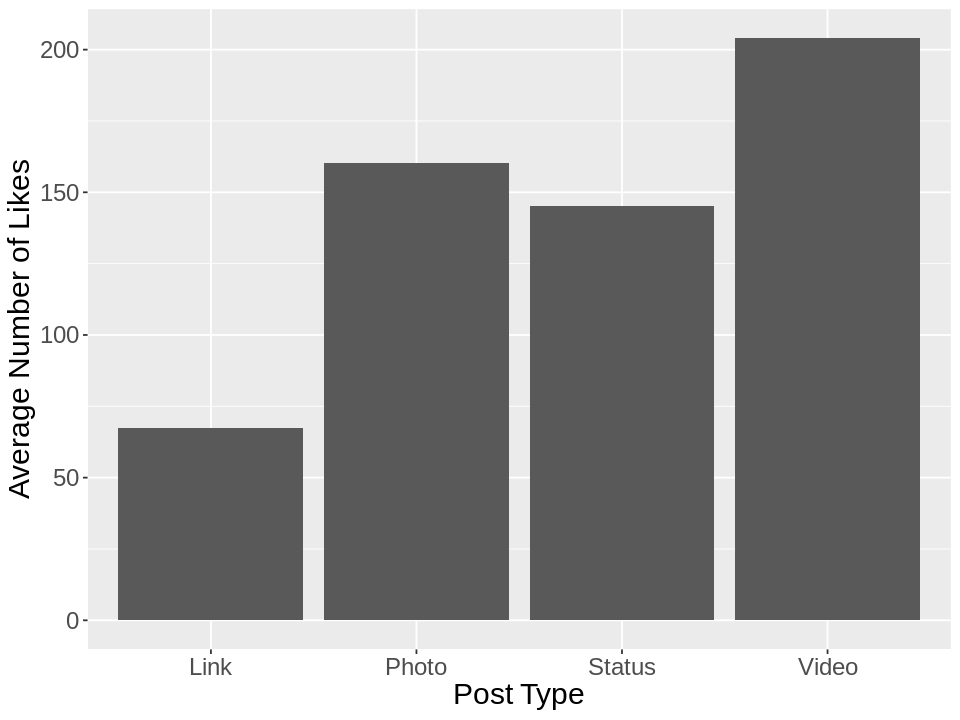

In [16]:
options(repr.plot.width = 8, repr.plot.height = 6) 

mean_likes_bar <- ggplot(filter_mean_like, aes(x = type, y = Value)) +
    geom_bar(stat = "identity") +
    labs(x = "Post Type", y = "Average Number of Likes") +
    theme(text = element_text(size = 18)) 

Amean_likes_bar

Average number of like per Facecbook post type.

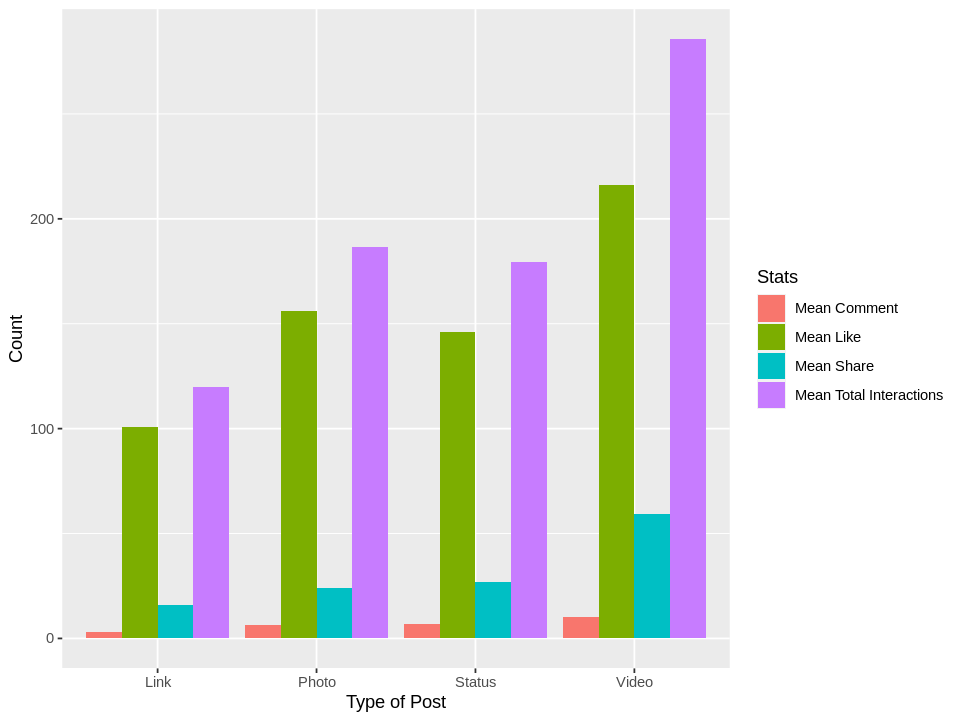

In [131]:
mean_fb <- ggplot(fb_long, aes(x = type, y = Value, fill = Stat)) +
    geom_col(position = "dodge") +
    labs(x = "Type of Post", y = "Count") +
    scale_fill_discrete(name = "Stats", labels = c("Mean Comment", "Mean Like", "Mean Share", "Mean Total Interactions"))

mean_fb

Total interactions of unpaid Facebook post type per total reach. 

Warning message:
“Removed 21 rows containing missing values (geom_point).”


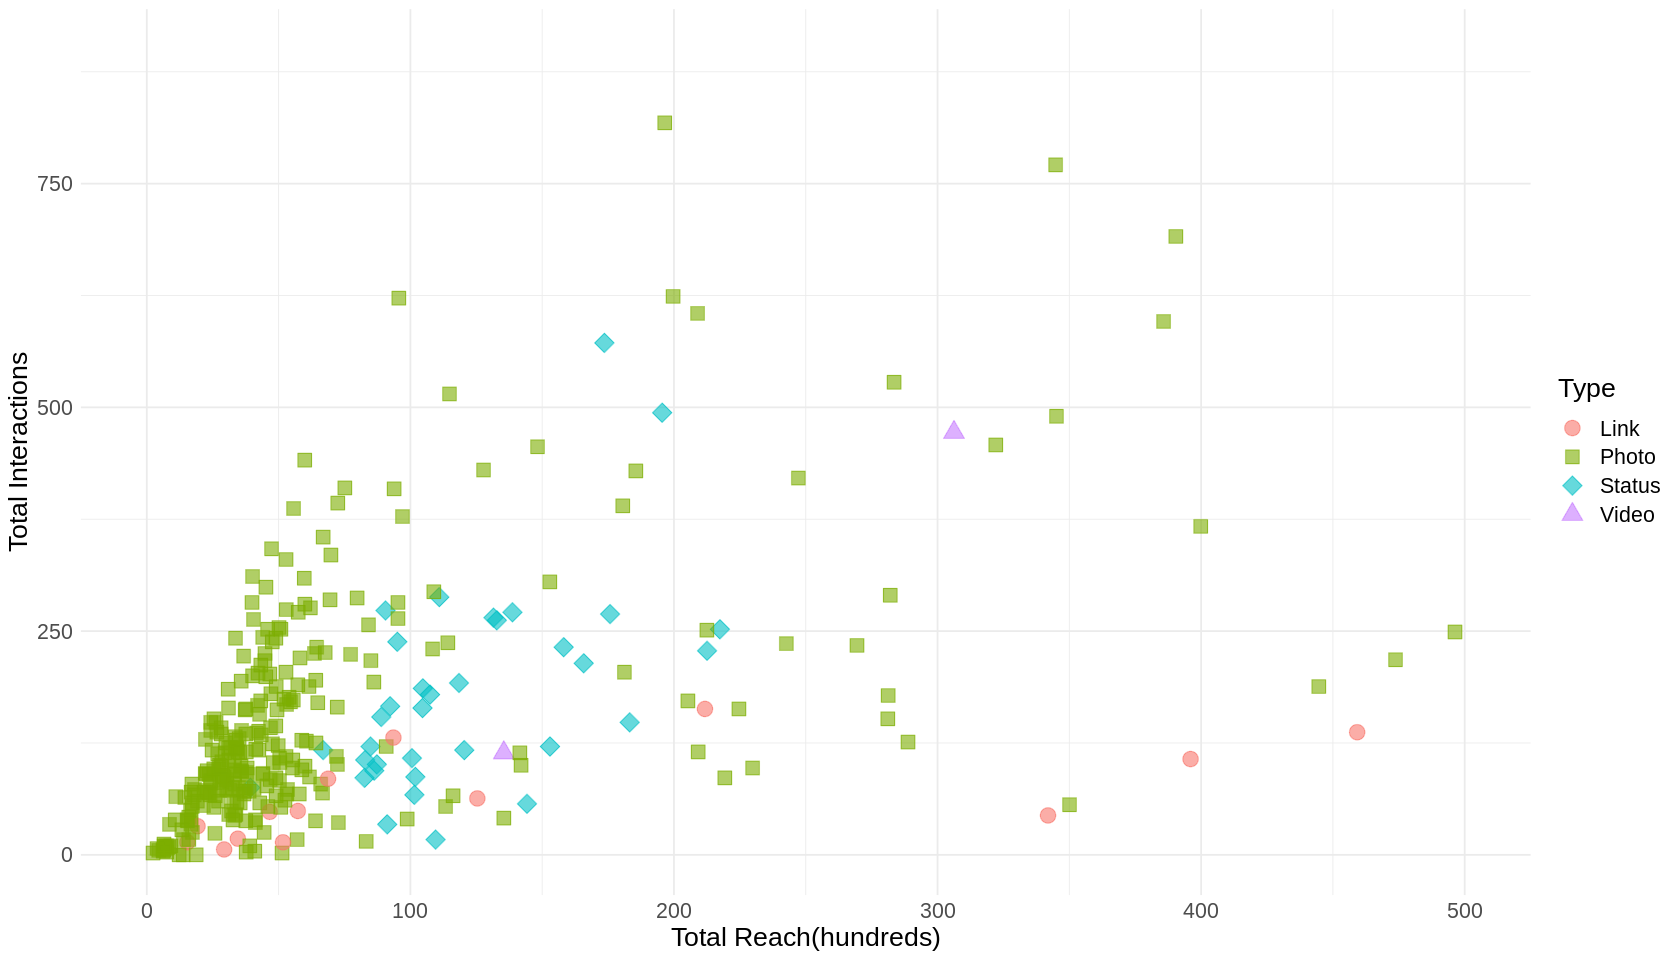

In [9]:
library(ggplot2)
unpaid_plot <- facebook_clean_unpaid %>% 
    ggplot(aes(x = Lifetime_Post_Total_Reach/100, y = Total_Interactions, shape=Type, color=Type, fill=Type))+
    geom_point(alpha=0.6, size=4)+
    labs(x="Total Reach(hundreds)", y="Total Interactions", group="Type")+
    scale_y_continuous(limits = c(0,900))+
    scale_x_continuous(limits = c(0,500))+
    scale_shape_manual(values = c(21,22,23,24)) +
    scale_size_manual(values=c(1,6,7,9))+
    theme_minimal()+
    theme(text = element_text(size = 16))
    options(repr.plot.width =14, repr.plot.height = 8) 
unpaid_plot

### Bibliography

Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research. 69(9), 3341 - 3351. 